In [62]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [63]:
# load data
df = pd.read_csv('Datafest - Sheet1.csv')
df.head()

,Age,Gender,Grade Level,Attendance Rate,Study Hours,Preferred Study Method,Quiet Study Space,Internet Access,Primary Guardian,Guardian Education,...,Chemistry,Biology,Geography,Lit-in-English,Government,Accounting,Commerce,Economics,Tutoring Support,Support Type
0,12,Female,SSS1,80,10,"Kinesthetic (e.g., hands-on activities)",Yes,No,Mother,Secondary education,...,70,88,60,86.0,64.0,65.0,55.0,80,Yes,"After-school tutoring, Peer mentoring"
1,15,Female,SSS 2,50,10 hours,Reading/Writing,Yes,"Yes, reliable",Both Father and Mother,"Higher education (Diploma, Bachelor's, Master'...",...,80,60,60,NaN,NaN,NaN,NaN,70,Yes,After-school tutoring
2,13,Female,SSS1,98%,80 hrs,Reading/Writing,Yes,"Yes, but unreliable",Both Father and Mother,"Higher education (Diploma, Bachelor's, Master'...",...,82,85,90,60.0,62.0,70.0,65.0,89,Yes,After-school tutoring
3,16,Female,SSS 2,1,1,Reading/Writing,Yes,"Yes, reliable",Both Father and Mother,Secondary education,...,NaN,30,NaN,20.0,20.0,NaN,NaN,20,Yes,Peer mentoring
4,16 years old,Female,SSS 2,100%,10 hours,Reading/Writing,Yes,"Yes, reliable",Both Father and Mother,"Higher education (Diploma, Bachelor's, Master'...",...,85 out of 100,72 out of 100,69 out of 100,NaN,NaN,NaN,NaN,59 out of 100,Yes,After-school tutoring


In [4]:
# displaying information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             65 non-null     object 
 1   Gender                          65 non-null     object 
 2   Grade Level                     65 non-null     object 
 3   Attendance Rate                 65 non-null     object 
 4   Study Hours                     65 non-null     object 
 5   Preferred Study Method          65 non-null     object 
 6   Quiet Study Space               65 non-null     object 
 7   Internet Access                 65 non-null     object 
 8   Primary Guardian                65 non-null     object 
 9   Guardian Education              65 non-null     object 
 10  Guardian Engagement             65 non-null     object 
 11  Library Usage                   65 non-null     object 
 12  Library Materials Availability  65 non

In [5]:
# displaying the the columns of the dataset
df.columns

Index(['Age', 'Gender', 'Grade Level', 'Attendance Rate', 'Study Hours',
       'Preferred Study Method', 'Quiet Study Space', 'Internet Access',
       'Primary Guardian', 'Guardian Education', 'Guardian Engagement',
       'Library Usage', 'Library Materials Availability',
       'Digital Resources Access', 'Teacher Support Hours ',
       'Teacher Availability', 'Teaching Aids Access', 'Classroom Condition',
       'Extracurricular Involvement', 'Extracurricular Activities',
       'Extracurricular Impact', 'Mathematics', 'English', 'Physics',
       'Chemistry', 'Biology', 'Geography', 'Lit-in-English', 'Government',
       'Accounting', 'Commerce', 'Economics', 'Tutoring Support',
       'Support Type'],
      dtype='object')

In [6]:
# displaying the shape of the dataset
df.shape

(65, 34)

In [7]:
# displaying the number of missing values in the dataset
df.isnull().sum()

Age                                0
Gender                             0
Grade Level                        0
Attendance Rate                    0
Study Hours                        0
Preferred Study Method             0
Quiet Study Space                  0
Internet Access                    0
Primary Guardian                   0
Guardian Education                 0
Guardian Engagement                0
Library Usage                      0
Library Materials Availability     0
Digital Resources Access           0
Teacher Support Hours              1
Teacher Availability               0
Teaching Aids Access               0
Classroom Condition                0
Extracurricular Involvement        0
Extracurricular Activities         6
Extracurricular Impact             0
Mathematics                        0
English                            0
Physics                           20
Chemistry                         20
Biology                            8
Geography                         27
L

In [10]:
# displaying the summary statistics of the dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,65,12,16,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,65,2,Female,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grade Level,65,4,SSS 2,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Attendance Rate,65,35,90,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Study Hours,65,38,1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Preferred Study Method,65,7,Reading/Writing,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quiet Study Space,65,2,Yes,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Internet Access,65,5,"Yes, reliable",33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Primary Guardian,65,4,Both Father and Mother,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Guardian Education,65,5,"Higher education (Diploma, Bachelor's, Master'...",28,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

### Data Cleaning

In [11]:
# displaying the student's scores
student_scores = df[['Mathematics', 'English', 'Physics', 'Chemistry', 'Biology', 'Geography', 'Lit-in-English',
                     'Government', 'Accounting', 'Commerce', 'Economics']]
student_scores.head()

,Mathematics,English,Physics,Chemistry,Biology,Geography,Lit-in-English,Government,Accounting,Commerce,Economics
0,78,65,82,70,88,60,86.0,64.0,65.0,55.0,80
1,60,70,70,80,60,60,NaN,NaN,NaN,NaN,70
2,74,84,80,82,85,90,60.0,62.0,70.0,65.0,89
3,20,20,NaN,NaN,30,NaN,20.0,20.0,NaN,NaN,20
4,93 over 100,87 out of 100,79 out of 100,85 out of 100,72 out of 100,69 out of 100,NaN,NaN,NaN,NaN,59 out of 100


In [12]:
# Function to clean scores by removing "over 100" or "out of 100"
def clean_scores(score):
    if isinstance(score, str):
        # Remove " over 100" or " out of 100" from the strings
        score = score.replace(' over 100', '').replace(' out of 100', '')
    try:
        return int(score)
    except (ValueError, TypeError):
        return None  # Return None for invalid or missing values

# Apply cleaning to all columns
student_scores = student_scores.applymap(clean_scores)

# Display the cleaned scores
student_scores.head()


C:\Users\user\AppData\Local\Temp\ipykernel_11276\4267874300.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  student_scores = student_scores.applymap(clean_scores)


,Mathematics,English,Physics,Chemistry,Biology,Geography,Lit-in-English,Government,Accounting,Commerce,Economics
0,78,65,82.0,70.0,88.0,60.0,86.0,64.0,65.0,55.0,80.0
1,60,70,70.0,80.0,60.0,60.0,NaN,NaN,NaN,NaN,70.0
2,74,84,80.0,82.0,85.0,90.0,60.0,62.0,70.0,65.0,89.0
3,20,20,NaN,NaN,30.0,NaN,20.0,20.0,NaN,NaN,20.0
4,93,87,79.0,85.0,72.0,69.0,NaN,NaN,NaN,NaN,59.0


In [13]:
# create a new column for the average score of each student and the target column for pass/fail

# Calculate the average of available subject scores for each student
df['Average_Score'] = student_scores.mean(axis=1).round(2)

# Define a passing threshold
passing_threshold = 50

# Create the Pass/Fail target column based on the average score
df['Target'] = df['Average_Score'].apply(lambda x: 'Pass' if x >= passing_threshold else 'Fail')

# Display the first few rows of the updated DataFrame
df[['Average_Score', 'Target']].head()

,Average_Score,Target
0,72.09,Pass
1,67.14,Pass
2,76.45,Pass
3,21.67,Fail
4,77.71,Pass


In [14]:
df['Target'].value_counts()

Target
Pass    45
Fail    20
Name: count, dtype: int64

In [15]:
# Fill missing values with 0 since they represent students who don't take the subject
student_scores.fillna(0, inplace=True)

# updating the student scores in the dataframe with the cleaned scores
df[['Mathematics', 'English', 'Physics', 'Chemistry', 
    'Biology', 'Geography', 'Lit-in-English','Government', 
    'Accounting', 'Commerce', 'Economics']] = student_scores

In [16]:
# displaying the updated dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             65 non-null     object 
 1   Gender                          65 non-null     object 
 2   Grade Level                     65 non-null     object 
 3   Attendance Rate                 65 non-null     object 
 4   Study Hours                     65 non-null     object 
 5   Preferred Study Method          65 non-null     object 
 6   Quiet Study Space               65 non-null     object 
 7   Internet Access                 65 non-null     object 
 8   Primary Guardian                65 non-null     object 
 9   Guardian Education              65 non-null     object 
 10  Guardian Engagement             65 non-null     object 
 11  Library Usage                   65 non-null     object 
 12  Library Materials Availability  65 non

In [17]:
df['Target'].value_counts() 

Target
Pass    45
Fail    20
Name: count, dtype: int64

In [18]:
# Cleaning the age column
df['Age'] = df['Age'].str.strip(' years old').astype(int)

In [19]:
# cleaning the attendance rate column
df['Attendance Rate'] = df['Attendance Rate'].str.strip('%')
df['Attendance Rate'] = df['Attendance Rate'].replace({'Not often': '40'}).astype(int)

In [20]:
# cleaning the study hours column
# Using str.replace() to remove the specified substrings from 'Study Hours'
df['Study Hours'] = df['Study Hours'].str.replace(' hours', '', case=False)
df['Study Hours'] = df['Study Hours'].str.replace(' hour', '', case=False)
df['Study Hours'] = df['Study Hours'].str.replace('hrs', '', case=False)
df['Study Hours'] = df['Study Hours'].str.replace('Hours', '', case=False)
df['Study Hours'] = df['Study Hours'].replace({'20 to 25': '20', '24-25': '24', '20 to 21': '20'}).astype(int)

In [21]:
# cleaning the teacher support hours column
# Function to clean and convert hours
def clean_teacher_hours(value):
    # If the value is already numeric, return it as an integer
    if isinstance(value, (int, float)):
        return value

    # Remove spaces and convert to lowercase for uniformity
    value = str(value).lower().strip()

    # Handle percentages: Convert percentages into a fraction of 40 hours (assumed as full-time)
    if '%' in value:
        percentage = int(value.replace('%', ''))
        return int((percentage / 100) * 40)  # Assume 40 hours is 100%

    # Handle "Rarely", "Not at all", "All day long", etc.
    if value in ['rarely', 'not at all']:
        return 1  # Assign 1 hour to "Rarely" and "Not at all"
    if value == 'all day long':
        return 40  # Assume "All day long" means full-time (40 hours)

    # Handle mixed units like "1 hr 30 mins"
    match = re.match(r"(\d+)\s*hr[s]?\s*(\d+)?\s*min[s]?", value)
    if match:
        hours = int(match.group(1))
        mins = int(match.group(2)) if match.group(2) else 0
        return hours + mins / 60

    # Handle hour ranges like "1h-3h" by averaging the range
    match = re.match(r"(\d+)[h\s]*-(\d+)[h\s]*", value)
    if match:
        return (int(match.group(1)) + int(match.group(2))) / 2

    # Extract numeric values from strings like "5 hours", "120Hours", "1 hour"
    match = re.match(r"(\d+)", value)
    if match:
        return int(match.group(1))

    # Handle fractions like "1/2 hour"
    if '1/2' in value:
        return 0.5

    # For unrecognized formats, return None to handle them later
    return None

# Apply the cleaning function to the 'Teacher Support Hours' column
df['Teacher Support Hours '] = df['Teacher Support Hours '].apply(clean_teacher_hours)

# Convert to integer, filling NaN with 0 (optional)
df['Teacher Support Hours '] = df['Teacher Support Hours '].fillna(0).astype(int)
df['Teacher Support Hours '].head()

0     8
1     5
2     1
3     1
4    22
Name: Teacher Support Hours , dtype: int32

In [22]:
# cleaning the preferred study method column to ensure cconsistency
df['Preferred Study Method'] = df['Preferred Study Method'].replace({'Auditory (e.g., lectures, discussions)': 'Auditory', 
                                                                     'Visual (e.g., charts, videos)': 'Visual', 
                                                                     'Kinesthetic (e.g., hands-on activities)': 'Kinesthetic'})

In [23]:
# cleaning the guardian education column to ensure consistency
df['Guardian Education'] = df['Guardian Education'].replace({'No Formal Education': 'None',
                                                             "Higher education (Diploma, Bachelor's, Master's, etc.)": 'Higher Education'})

In [24]:
# cleaning the support type column to ensure consistency
df['Support Type'] = df['Support Type'].replace({'After-school tutoring, Peer mentoring': 'After-school tutoring',
                                                 'After-school tutoring, Online resources': 'After-school tutoring',
                                                 'After-school tutoring, Online resources, Peer mentoring': 'After-school tutoring'})

In [25]:
# cleaning the extracurricular activities column to ensure consistency
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({'Sports, Drama, Debate, Science Club': 'Sports',
                                                                             'Drama, Sports, Music': 'Drama',
                                                                             'Sports, Music': 'Sports',
                                                                             'Sports, Science Club': 'Sports'})

In [26]:
# cleaning the teacher availability column to ensure consistency
df['Teacher Availability'] = df['Teacher Availability'].replace({'Adequate, Somewhat adequate': 'Adequate'})

In [27]:
df['Internet Access'] = df['Internet Access'].replace({'No': 'No internet', 'Yes, reliable': 'Reliable', 
                                                       'Yes, but unreliable': 'Unreliable'})

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             65 non-null     int32  
 1   Gender                          65 non-null     object 
 2   Grade Level                     65 non-null     object 
 3   Attendance Rate                 65 non-null     int32  
 4   Study Hours                     65 non-null     int32  
 5   Preferred Study Method          65 non-null     object 
 6   Quiet Study Space               65 non-null     object 
 7   Internet Access                 65 non-null     object 
 8   Primary Guardian                65 non-null     object 
 9   Guardian Education              65 non-null     object 
 10  Guardian Engagement             65 non-null     object 
 11  Library Usage                   65 non-null     object 
 12  Library Materials Availability  65 non

In [28]:
# saving the cleaned dataframe
# df.to_csv('Datafest.csv', index=False)

### Data Visualization

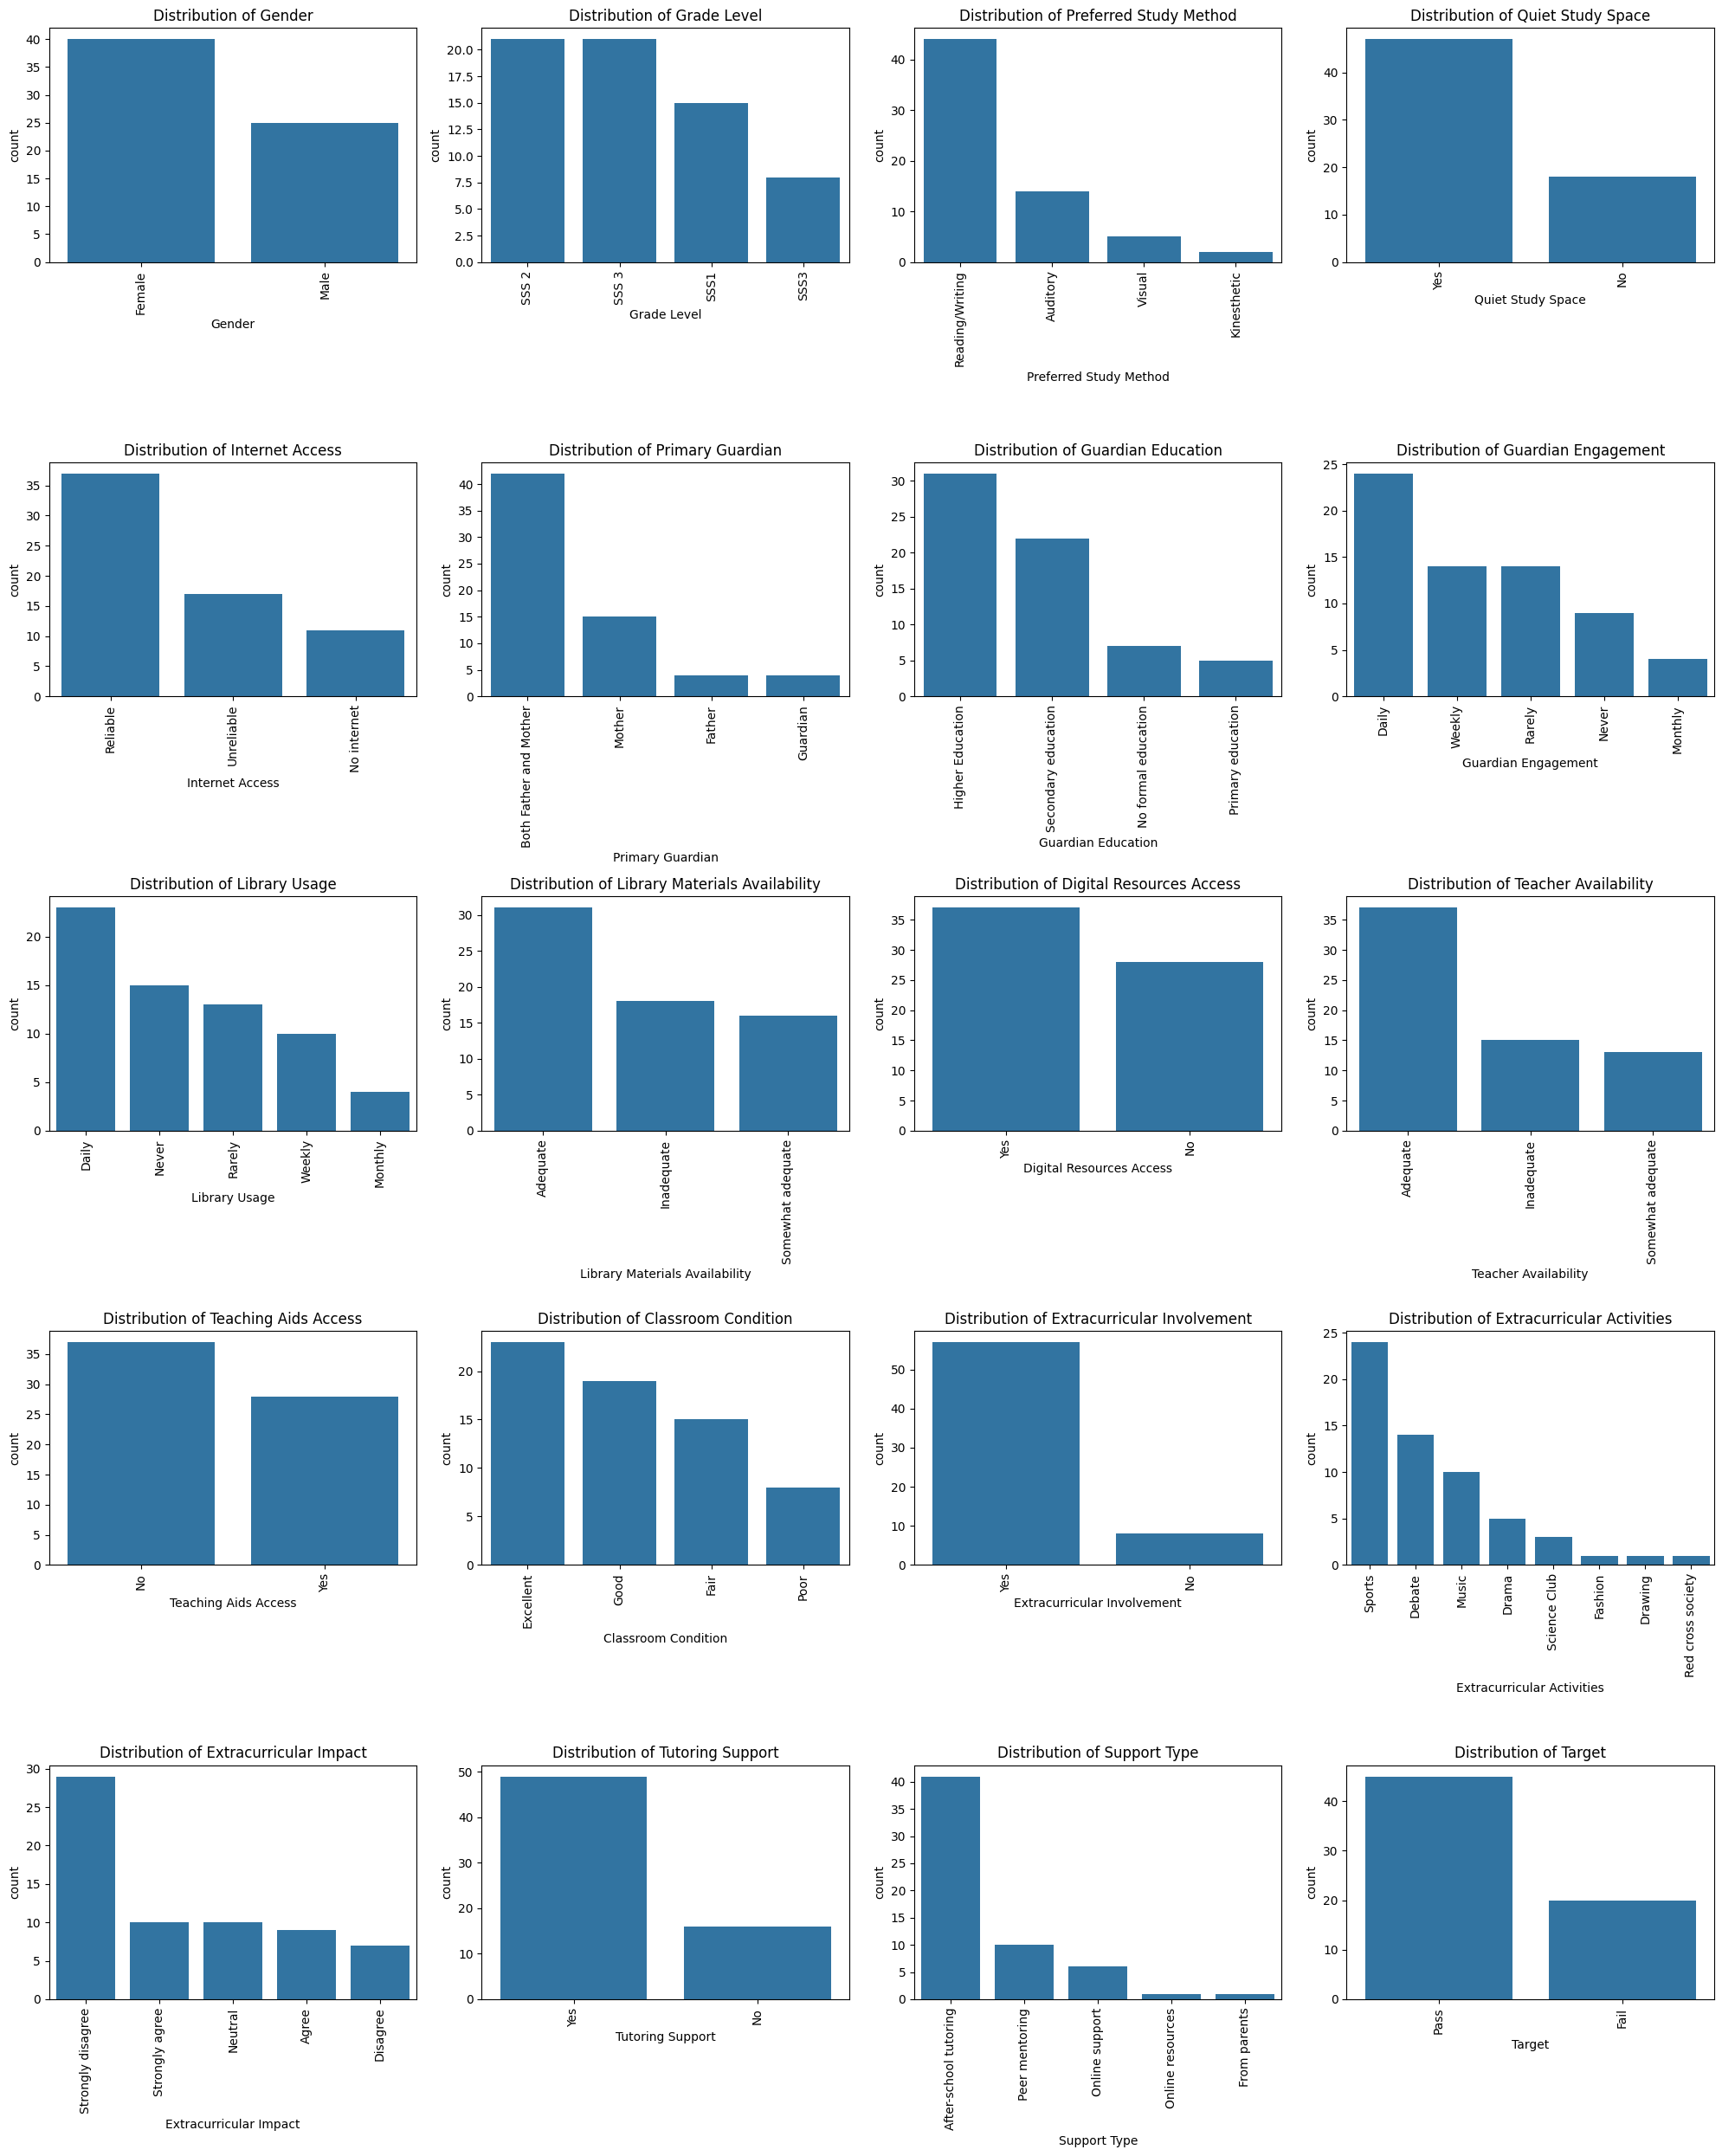

In [29]:
# Select all categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Determine the number of rows and columns for subplots
num_cols = 4  # Number of plots in a row
num_plots = len(categorical_columns)  # Total number of categorical columns
num_rows = math.ceil(num_plots / num_cols)  # Calculate the number of rows needed

# Create subplots with a dynamic number of rows and fixed columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))

# Flatten axes to iterate over them easily
axes = axes.flatten()

# Plot each categorical column with bars in descending order
for i, col in enumerate(categorical_columns):
    # Get value counts and sort the categories in descending order
    sorted_counts = df[col].value_counts().index
    
    # Create the count plot with sorted categories
    sns.countplot(x=col, data=df, order=sorted_counts, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=90)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout();

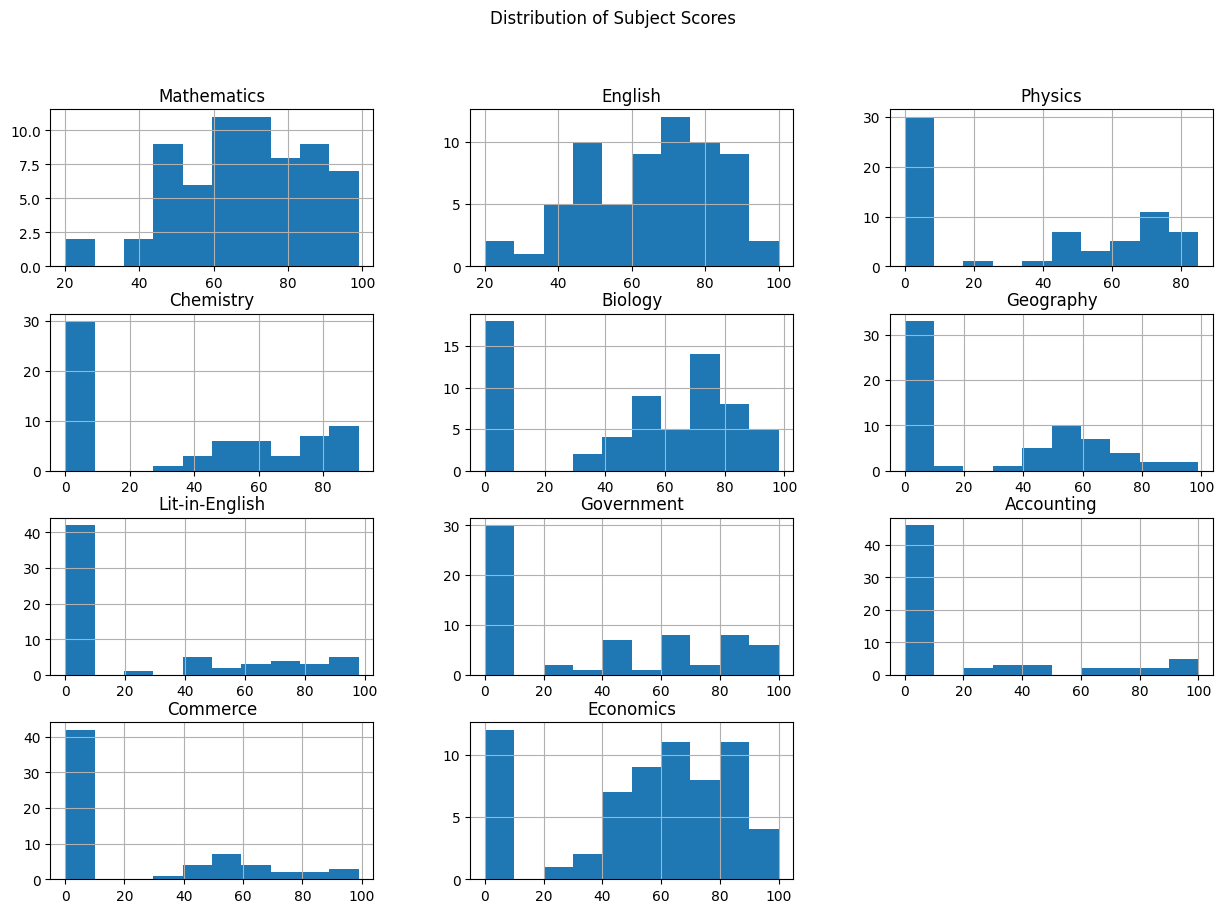

In [30]:
# Distribution of Subject Scores

df[['Mathematics', 'English', 'Physics', 'Chemistry', 'Biology', 'Geography',
    'Lit-in-English', 'Government', 'Accounting', 'Commerce', 'Economics']].hist(bins=10, figsize=(15, 10))
plt.suptitle('Distribution of Subject Scores')
plt.savefig('Subject_Scores_Histogram.png');

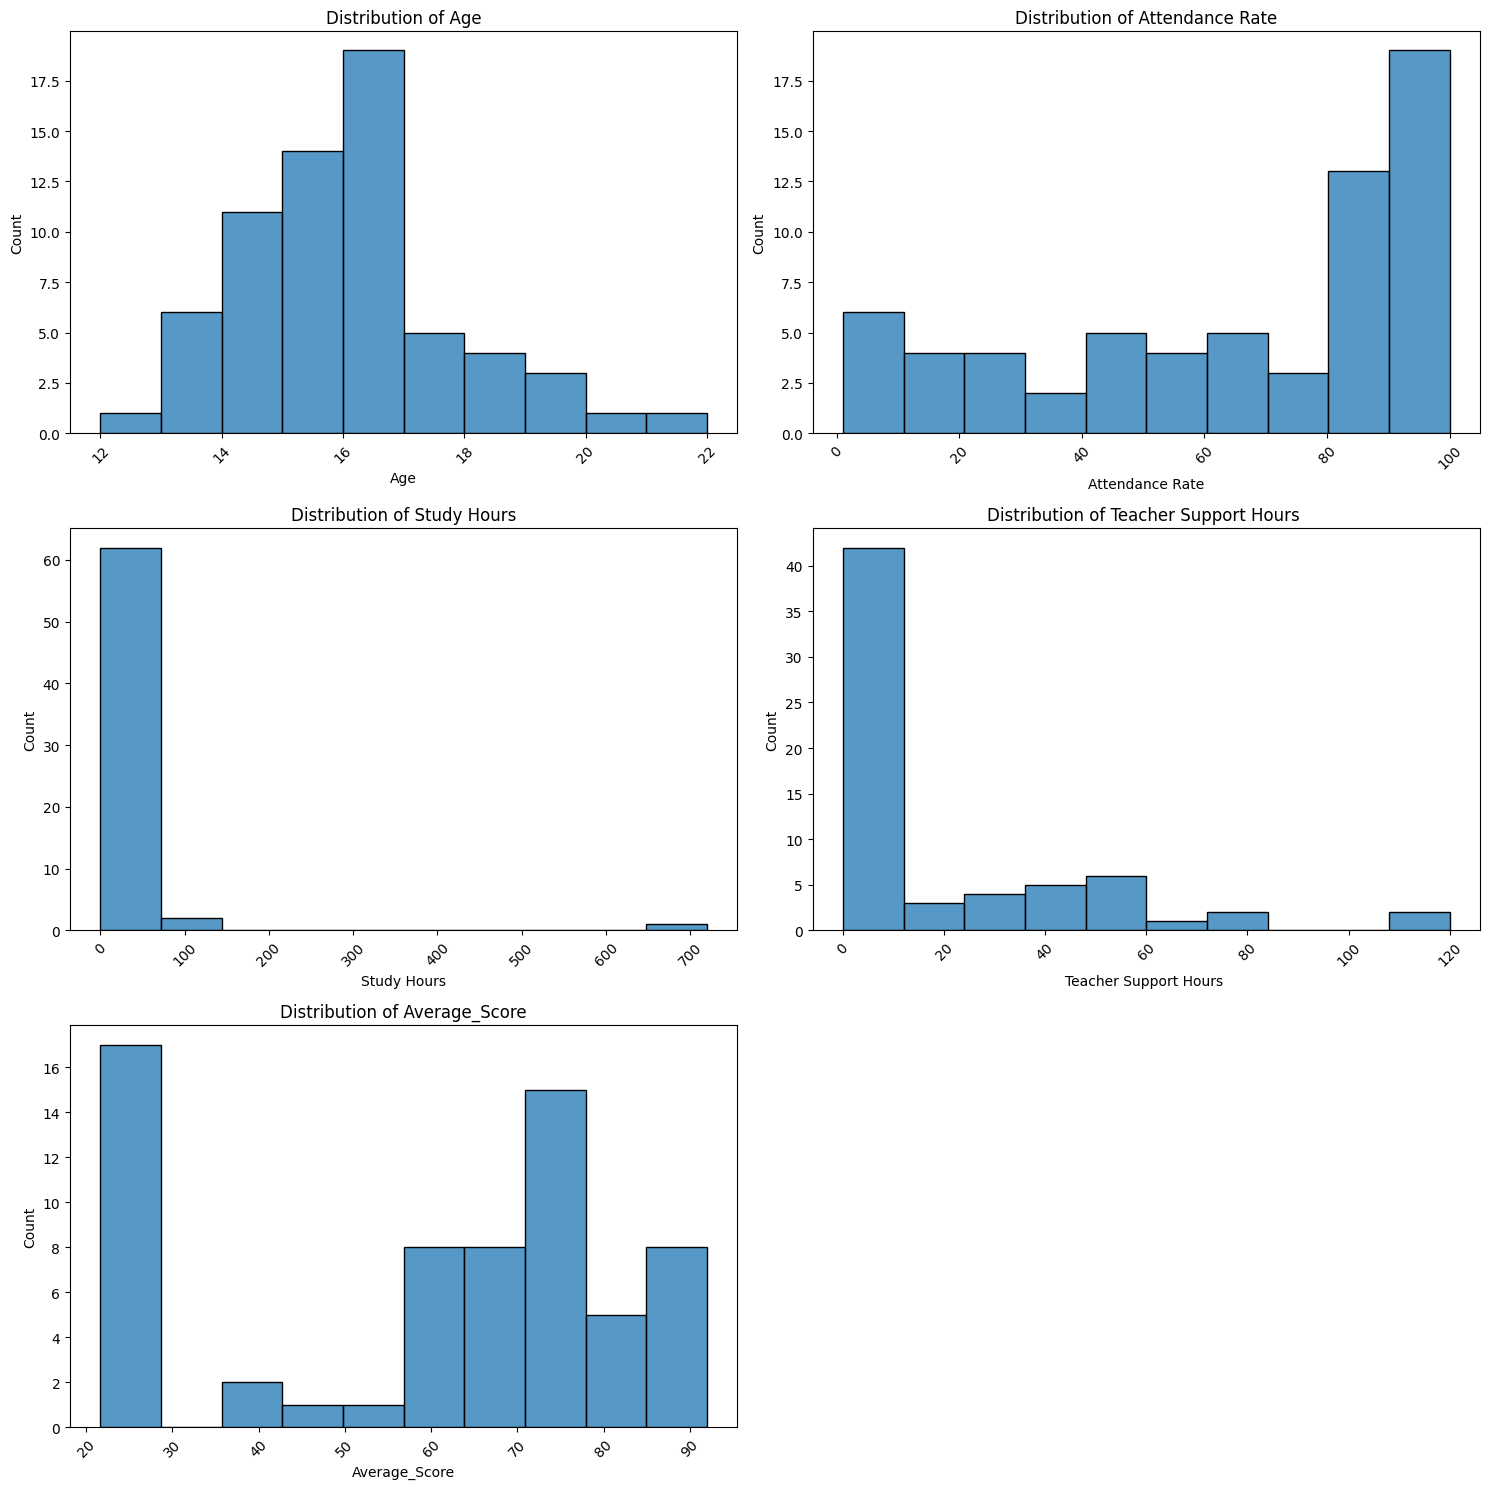

In [31]:
# List of columns representing student scores (adjust these column names as per your data)
score_columns = ['Mathematics', 'English', 'Physics', 'Chemistry', 'Biology', 'Geography',
                 'Lit-in-English', 'Government', 'Accounting', 'Commerce', 'Economics']

# Select numerical columns excluding the student score columns
numerical_columns = df.select_dtypes(include=['float64', 'int64', 'int32']).columns
numerical_columns = [col for col in numerical_columns if col not in score_columns]

# Determine the number of rows and columns for subplots
num_cols = 2  # Number of plots in a row
num_plots = len(numerical_columns)  # Total number of numerical columns
num_rows = math.ceil(num_plots / num_cols)  # Calculate the number of rows needed

# Create subplots with a dynamic number of rows and fixed columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))

# Flatten axes to iterate over them easily
axes = axes.flatten()

# Plot each numerical column as a histogram with bars in descending order
for i, col in enumerate(numerical_columns):
    # Plot the histogram for each numerical column
    sns.histplot(df[col], kde=False, ax=axes[i], bins=10)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout();

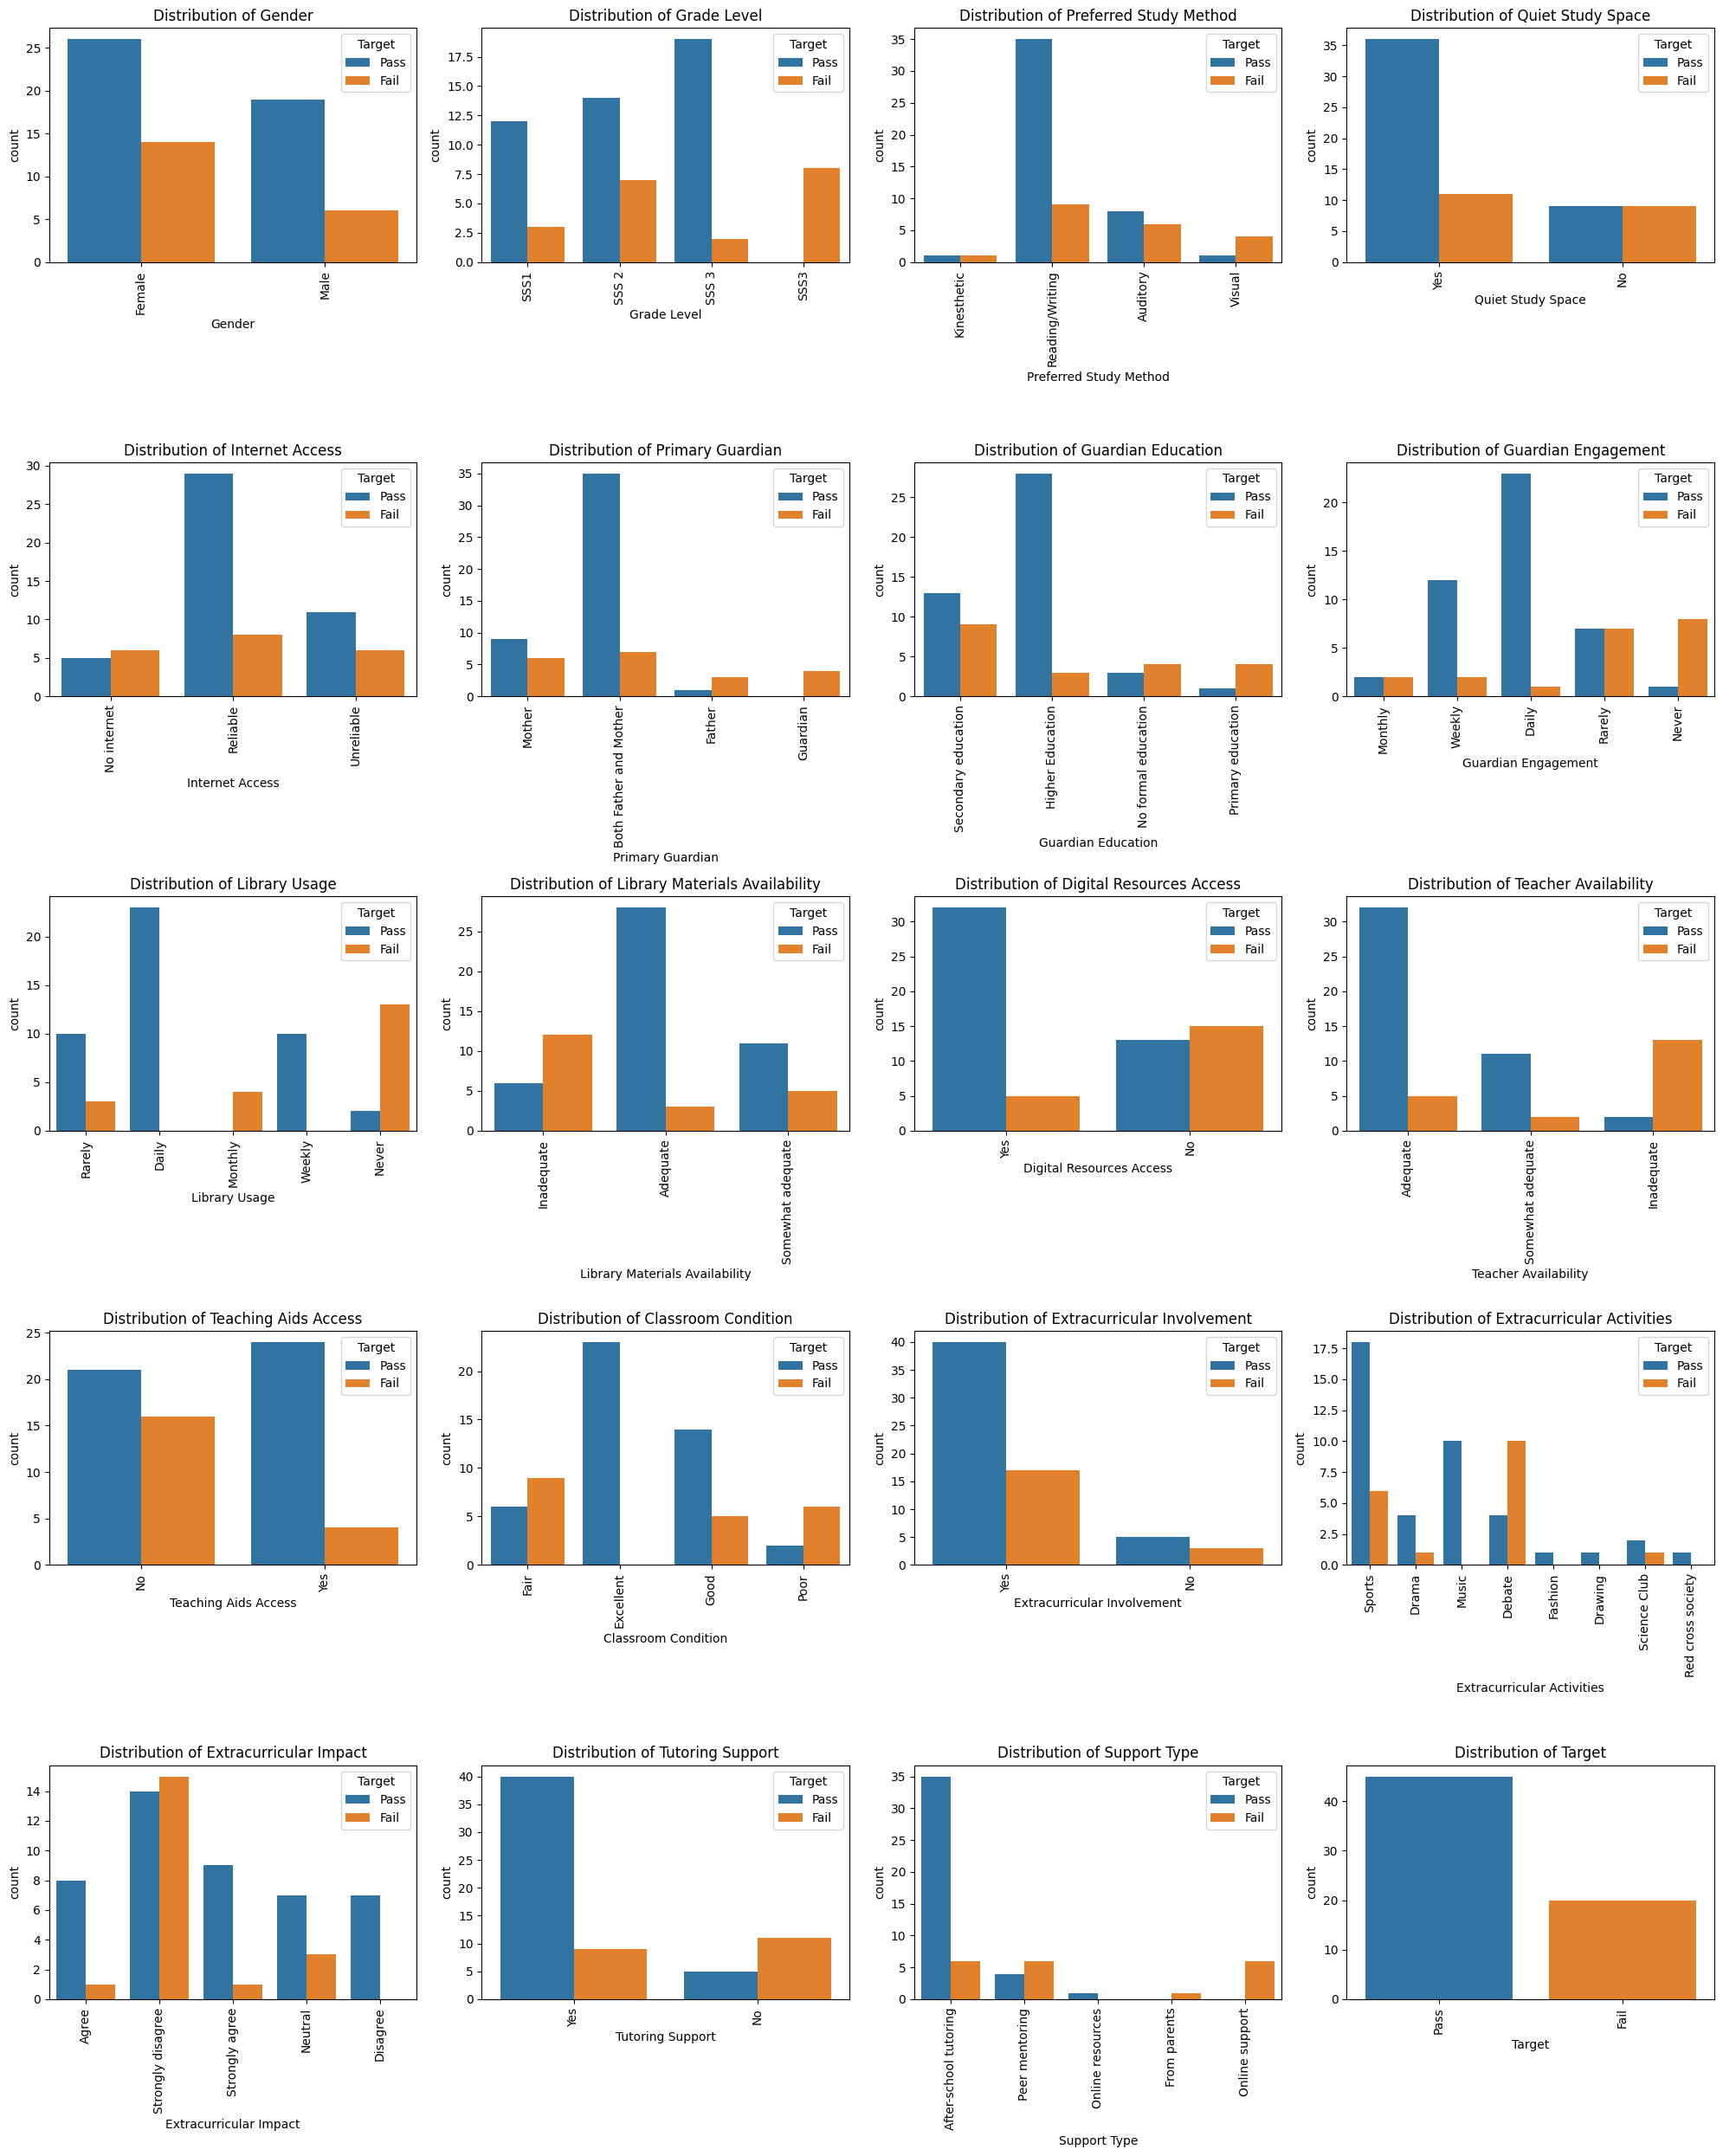

In [32]:
# Select all categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Determine the number of rows and columns for subplots
num_cols = 4  # Number of plots in a row
num_plots = len(categorical_columns)  # Total number of categorical columns
num_rows = math.ceil(num_plots / num_cols)  # Calculate the number of rows needed

# Create subplots with a dynamic number of rows and fixed columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))

# Flatten axes to iterate over them easily
axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, hue='Target', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=90)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

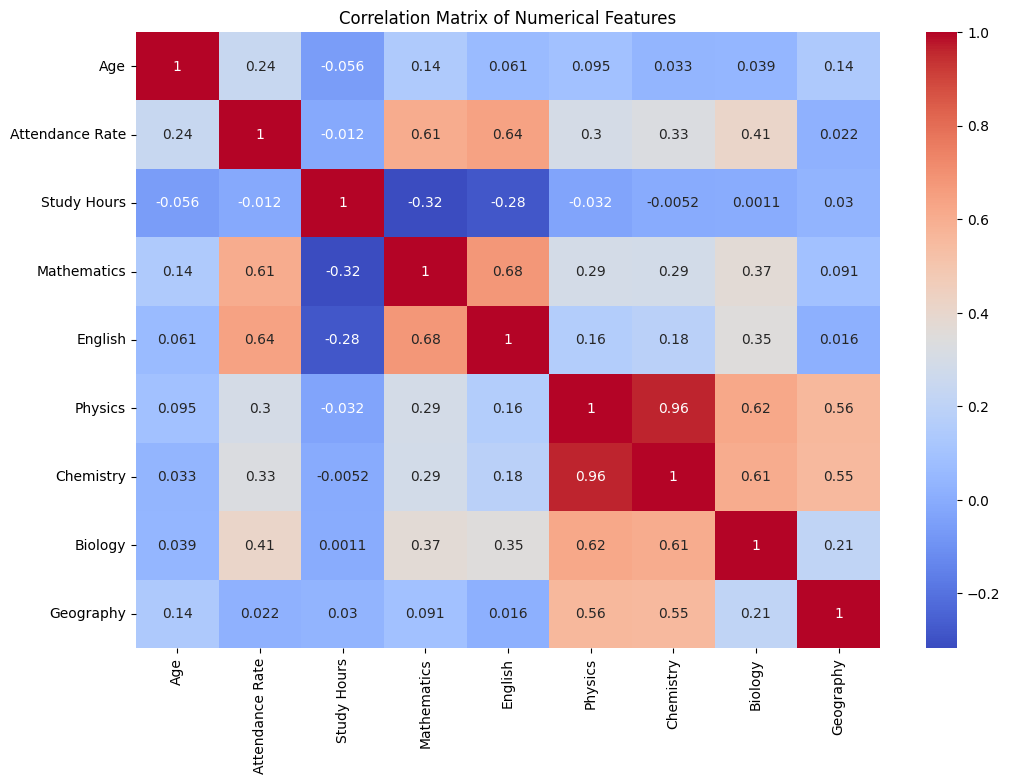

In [33]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[['Age', 'Attendance Rate', 'Study Hours', 'Mathematics', 'English',
                         'Physics', 'Chemistry', 'Biology', 'Geography']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


### Data Preprocessing

In [34]:
# dropping columns that are not needed for the model
df.drop(columns=['Gender', 'Preferred Study Method', 'Primary Guardian',
                 'Guardian Education', 'Library Materials Availability', 'Digital Resources Access',
                 'Classroom Condition', 'Physics', 'Chemistry', 'Biology', 'Geography', 'Lit-in-English',
                 'Accounting', 'Commerce', 'Economics', 'Government', 'Support Type',
                 'Extracurricular Activities', 'Mathematics', 'English', 'Teaching Aids Access',
                 'Extracurricular Involvement'], axis=1, inplace=True)

In [35]:
# displaying the updated dataframe
df.head()

,Age,Grade Level,Attendance Rate,Study Hours,Quiet Study Space,Internet Access,Guardian Engagement,Library Usage,Teacher Support Hours,Teacher Availability,Extracurricular Impact,Tutoring Support,Average_Score,Target
0,12,SSS1,80,10,Yes,No internet,Monthly,Rarely,8,Adequate,Agree,Yes,72.09,Pass
1,15,SSS 2,50,10,Yes,Reliable,Weekly,Daily,5,Adequate,Strongly disagree,Yes,67.14,Pass
2,13,SSS1,98,80,Yes,Unreliable,Weekly,Rarely,1,Somewhat adequate,Agree,Yes,76.45,Pass
3,16,SSS 2,1,1,Yes,Reliable,Weekly,Monthly,1,Adequate,Agree,Yes,21.67,Fail
4,16,SSS 2,100,10,Yes,Reliable,Daily,Daily,22,Adequate,Strongly disagree,Yes,77.71,Pass


In [36]:
# Encoding categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [37]:
# displaying the encoded dataframe
df.head()

,Age,Grade Level,Attendance Rate,Study Hours,Quiet Study Space,Internet Access,Guardian Engagement,Library Usage,Teacher Support Hours,Teacher Availability,Extracurricular Impact,Tutoring Support,Average_Score,Target
0,12,2,80,10,1,0,1,3,8,0,0,1,72.09,1
1,15,0,50,10,1,1,4,0,5,0,4,1,67.14,1
2,13,2,98,80,1,2,4,3,1,2,0,1,76.45,1
3,16,0,1,1,1,1,4,1,1,0,0,1,21.67,0
4,16,0,100,10,1,1,0,0,22,0,4,1,77.71,1


In [50]:
#Splitting the data into features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39, 13), (26, 13), (39,), (26,))

In [52]:
y_train.value_counts(), y_test.value_counts()

(Target
 1    26
 0    13
 Name: count, dtype: int64,
 Target
 1    19
 0     7
 Name: count, dtype: int64)

The target variable is imbalance

In [53]:
# resolute the training data using SMOTE
# Resample the training data with a smaller number of neighbors
smote = SMOTE(random_state=42, k_neighbors=1)  
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [54]:
# Display the class distribution after resampling
y_train_resampled.value_counts()

Target
0    26
1    26
Name: count, dtype: int64

In [55]:
# standardize the features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [56]:
# Initialize model list and results list
model_names = []
f1_scores = []  

# Define all the models you want to compare
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000, random_state=42)),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=3)),
    ("Decision Tree", DecisionTreeClassifier(max_depth=3, random_state=42)),
    ("Naive Bayes", GaussianNB()),
    ("Support Vector Machine", SVC(kernel='linear', random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=42))
]

# Iterate through each model, fit it, and calculate the F1 score
for name, model in models:
    model.fit(X_train_resampled_scaled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    f1 = f1_score(y_test, y_pred)
    
    # Append model name and F1 score to the respective lists
    model_names.append(name)
    f1_scores.append(f1)

# Display the results
for name, score in zip(model_names, f1_scores):
    print(f"{name}: F1 Score = {score:.2f}")
    print(f"{name}: Classification Report\n{classification_report(y_test, model.predict(X_test_scaled))}\n")

Logistic Regression: F1 Score = 0.95
Logistic Regression: Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.95      0.97        19

    accuracy                           0.96        26
   macro avg       0.94      0.97      0.95        26
weighted avg       0.97      0.96      0.96        26


K-Nearest Neighbors: F1 Score = 0.92
K-Nearest Neighbors: Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.95      0.97        19

    accuracy                           0.96        26
   macro avg       0.94      0.97      0.95        26
weighted avg       0.97      0.96      0.96        26


Decision Tree: F1 Score = 0.97
Decision Tree: Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
       

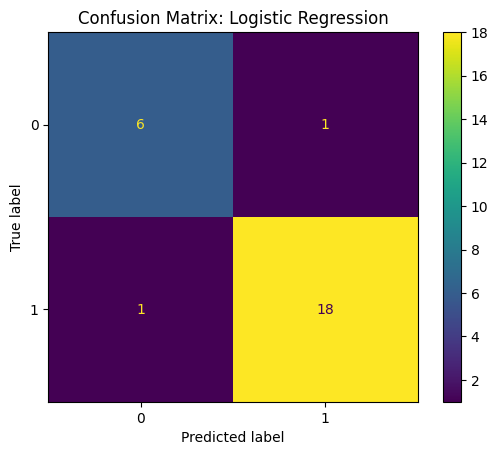

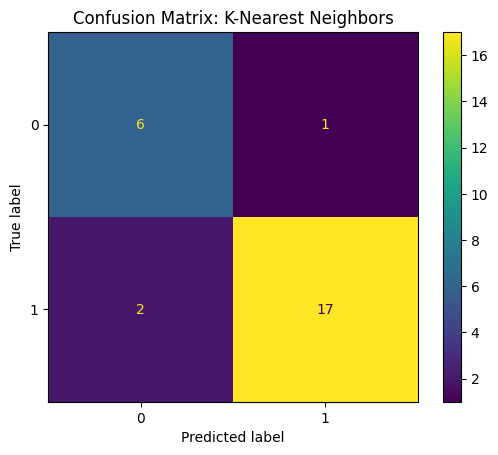

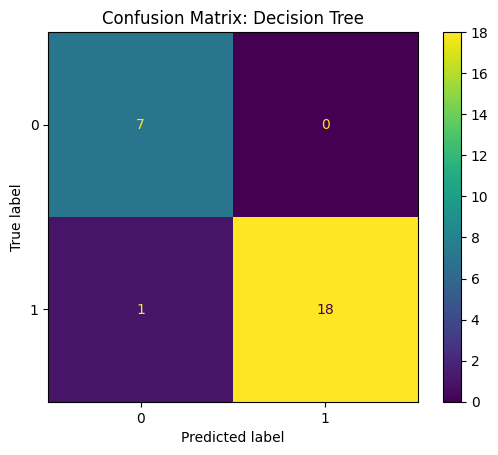

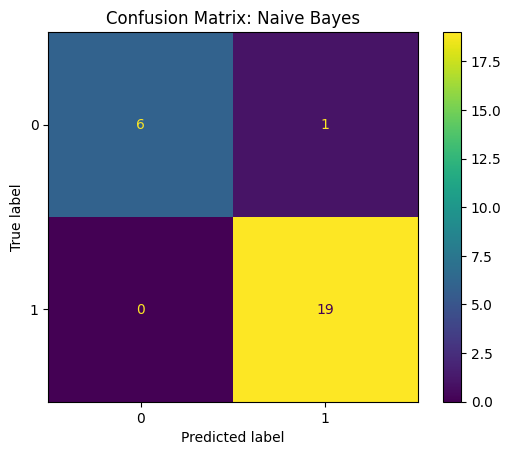

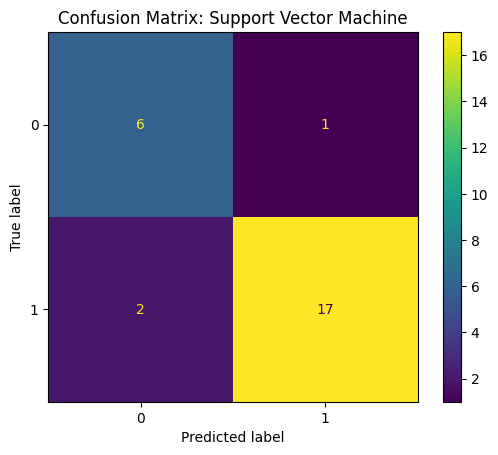

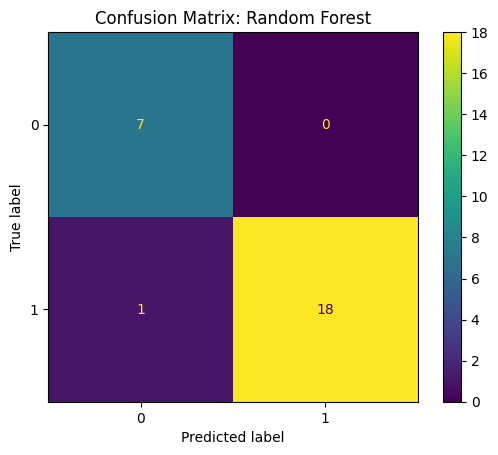

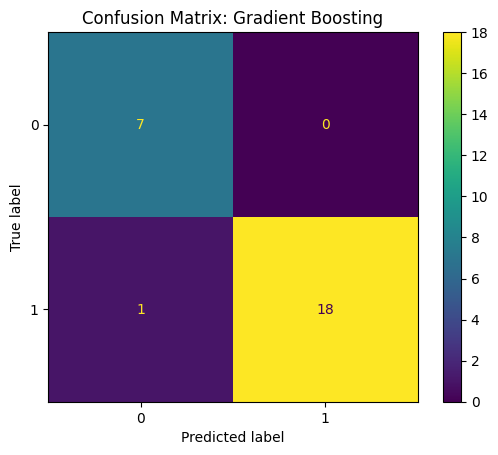

In [59]:
# dsplaying the confusion matrix for each model
for name, model in models:
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.title(f"Confusion Matrix: {name}");


In [60]:
## To avoid overfitting, and because the dataset is small, 
# we tune the hyperparameters of the Logistic Regression model using GridSearchCV since it is performing better than other models.

# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'] # Different solvers
}

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='f1')

# Fit the model with grid search on the training set
grid_search.fit(X_train_resampled_scaled, y_train_resampled)

# Get the best hyperparameters
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Use the best model from GridSearchCV to make predictions on the test set
best_model = grid_search.best_estimator_

# Predict on the test set with probability
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class
y_pred = best_model.predict(X_test_scaled)

# Generate and print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))


Best parameters: {'C': 0.01, 'solver': 'liblinear'}
Best cross-validation score: 0.9636363636363636
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.95      0.95      0.95        19

    accuracy                           0.92        26
   macro avg       0.90      0.90      0.90        26
weighted avg       0.92      0.92      0.92        26

Accuracy: 0.9230769230769231
F1 score: 0.9473684210526315


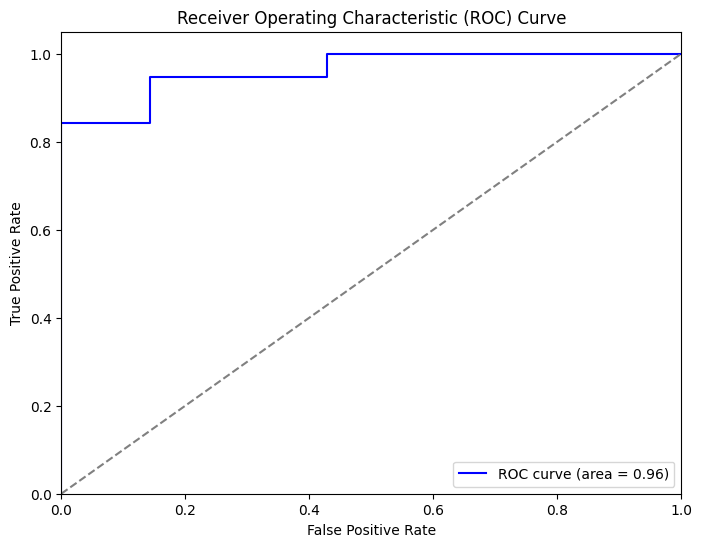

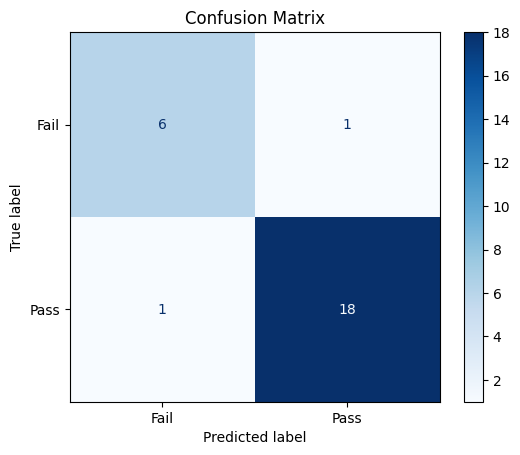

In [65]:
# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('ROC_Curve.png')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.savefig('Confusion_Matrix.png')


**Confusion Matrix:**

True Positives (TP): 18 (students correctly predicted to pass the exam).

True Negatives (TN): 6 (students correctly predicted to fail the exam).

False Positives (FP): 1 (student incorrectly predicted to pass but actually failed).

False Negatives (FN): 1 (student incorrectly predicted to fail but actually passed).

This shows that the Logistic Regression model is performing well, with only 2 misclassifications out of 26 predictions. Specifically

**ROC Curve:**

Area Under the Curve (AUC): 0.96

A high AUC of 0.96 indicates that the model is excellent at distinguishing between the two classes (pass and fail). The closer the AUC is to 1.0, the better the model is at predicting the outcome correctly.


**Performance:** 

The Logistic Regression model, after hyperparameter tuning, is performing well. With an AUC of 0.96, it is very effective at distinguishing between students who will pass and those who will fail.

Misclassification: The confusion matrix shows very few misclassifications (only 1 false positive and 1 false negative), meaning the model is both precise and sensitive.

Generalization: Logistic regression is a simple model, which tends to generalize well, especially on small dataset. Hence, it is likely not overfitting.

In [68]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(best_model, 'logistic_model.pkl')


['logistic_model.pkl']

In [69]:
# Save the scaler
joblib.dump(scaler, 'scaler.pkl') 

['scaler.pkl']